<a href="https://colab.research.google.com/github/SergeiRaik/hy-research/blob/main/polyplex-analysis/nanodrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!wget https://github.com/SergeiRaik/hy-research/raw/main/polyplex-analysis/nanodrop-data/nanodrop_28052024.zip
#!unzip /content/nanodrop_28052024.zip

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
filepath = 'nanodrop-data/nanodrop_28052024_unzipped/Oligo DNA 5_28_2024 12_45_46 PM.csv'
sample_names = ['DNA', '2p5', '2p5_HA', 'DNA_filtr1', 'DNA_filtr2', '2p5_filtr', '2p5_HA_filtr']
spectra_file_path = 'nanodrop-data/nanodrop_28052024_unzipped/Oligo DNA 5_28_2024 12_45_46 PM_table.tsv'


In [4]:
def read_nanodrop(filepath:str, sample_names:list):
    df = pd.read_csv(filepath, encoding = 'utf-16', delimiter = '\t')
    df.columns = df.columns.str.replace(' ', '')
    df['SampleName'] = sample_names
    df['Date'] = pd.to_datetime(df['Date'])
    return df

def read_spectra(spectra_file_path: str, sample_names: list):
    spectra_df = pd.read_csv(spectra_file_path, delimiter='\t', skiprows=2).transpose()
    spectra_df = spectra_df.drop(index=['Date and Time', 'Sample ID', 'Username'])
    spectra_df.columns = sample_names
    spectra_df = spectra_df.reset_index()
    spectra_df = spectra_df.rename(columns={'index': 'wavelength(nm)'})
    spectra_df['wavelength(nm)'] = pd.to_numeric(spectra_df['wavelength(nm)'])
    return spectra_df

In [5]:
df = read_nanodrop(filepath, sample_names)
df

,Date,SampleName,NucleicAcid(ng/uL),A260/A280,A260/A230,A260,A280,NucleicAcidFactor,BaselineCorrection(nm),BaselineAbsorbance,OligoSequence
0,2024-05-28 12:45:46,DNA,14.718,1.831,2.284,0.464,0.253,31.73,340,0.014,TGGCTTGAAGATGTACTCGAT
1,2024-05-28 12:47:19,2p5,11.092,1.112,1.030,0.350,0.314,31.73,340,0.279,TGGCTTGAAGATGTACTCGAT
2,2024-05-28 12:48:49,2p5_HA,17.888,1.319,1.113,0.564,0.427,31.73,340,0.157,TGGCTTGAAGATGTACTCGAT
3,2024-05-28 12:50:47,DNA_filtr1,6.846,1.590,1.523,0.216,0.136,31.73,340,-0.019,TGGCTTGAAGATGTACTCGAT
4,2024-05-28 12:51:44,DNA_filtr2,7.185,1.797,1.880,0.226,0.126,31.73,340,0.009,TGGCTTGAAGATGTACTCGAT
5,2024-05-28 12:53:22,2p5_filtr,0.189,1.212,0.227,0.006,0.005,31.73,340,-0.004,TGGCTTGAAGATGTACTCGAT
6,2024-05-28 12:55:02,2p5_HA_filtr,0.477,1.067,0.475,0.015,0.014,31.73,340,-0.012,TGGCTTGAAGATGTACTCGAT


In [6]:
spectra_df = read_spectra(spectra_file_path, sample_names)
spectra_df.dtypes


wavelength(nm)    float64
DNA                object
2p5                object
2p5_HA             object
DNA_filtr1         object
DNA_filtr2         object
2p5_filtr          object
2p5_HA_filtr       object
dtype: object

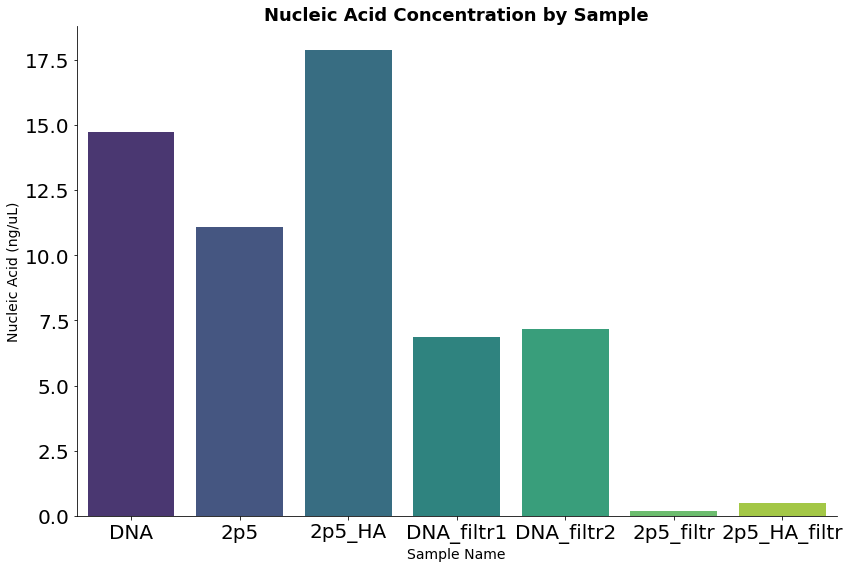

In [10]:
# Create the bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='SampleName', y='NucleicAcid(ng/uL)', data=df, 
                      palette='viridis', capsize=0.1, errwidth=1.5)

# Add titles and labels
plt.title('Nucleic Acid Concentration by Sample', fontsize=18, weight='bold')
plt.xlabel('Sample Name', fontsize=14)
plt.ylabel('Nucleic Acid (ng/uL)', fontsize=14)

# Customize the ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.savefig('output/dna_binding.png')

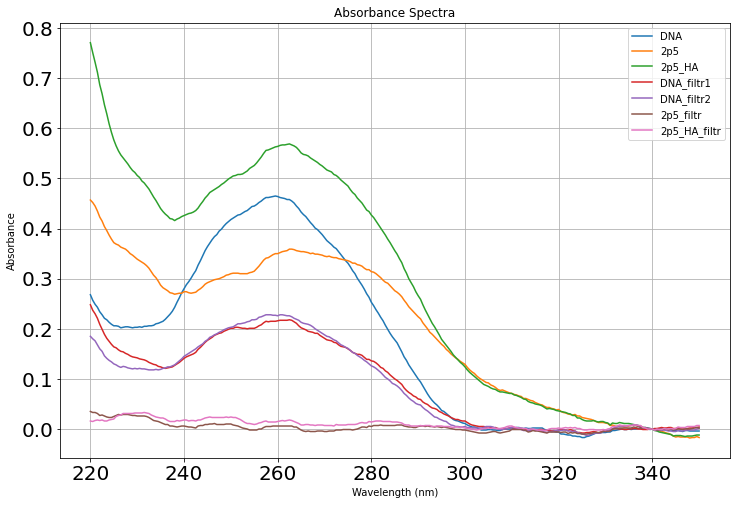

In [12]:
wavelengths = spectra_df.iloc[:, 0]
spectra = spectra_df.iloc[:, 1:]

plt.figure(figsize=(12, 8))

for column in spectra.columns:
    plt.plot(wavelengths, spectra[column], label=column)

# Customize the ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Absorbance Spectra')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('output/nanodrop_spectra.png')